In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\Olencia\AppData\Local\Temp\ipykernel_18140\3939422071.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="airline_sentiment", data=df, ax=axes[0, 0], palette="Set2")
C:\Users\Olencia\AppData\Local\Temp\ipykernel_18140\3939422071.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


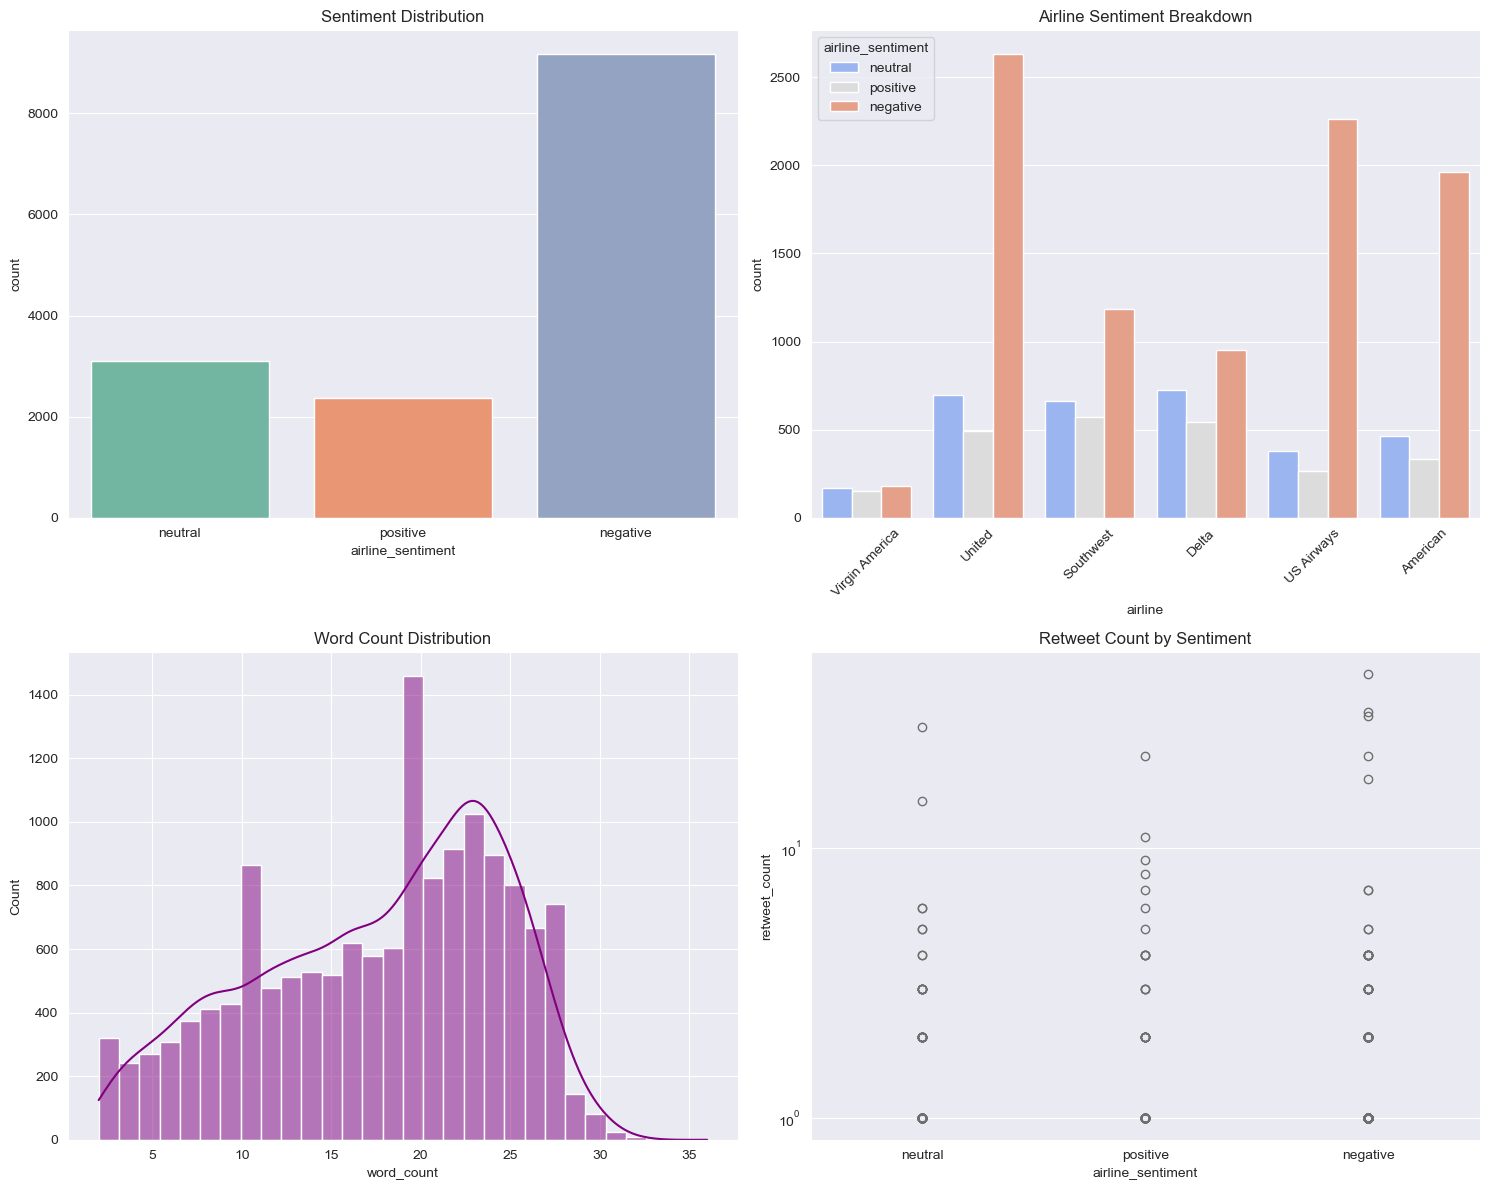

C:\Users\Olencia\AppData\Local\Temp\ipykernel_18140\3939422071.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="airline", palette="pastel", ax=axes[0, 0])
C:\Users\Olencia\AppData\Local\Temp\ipykernel_18140\3939422071.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


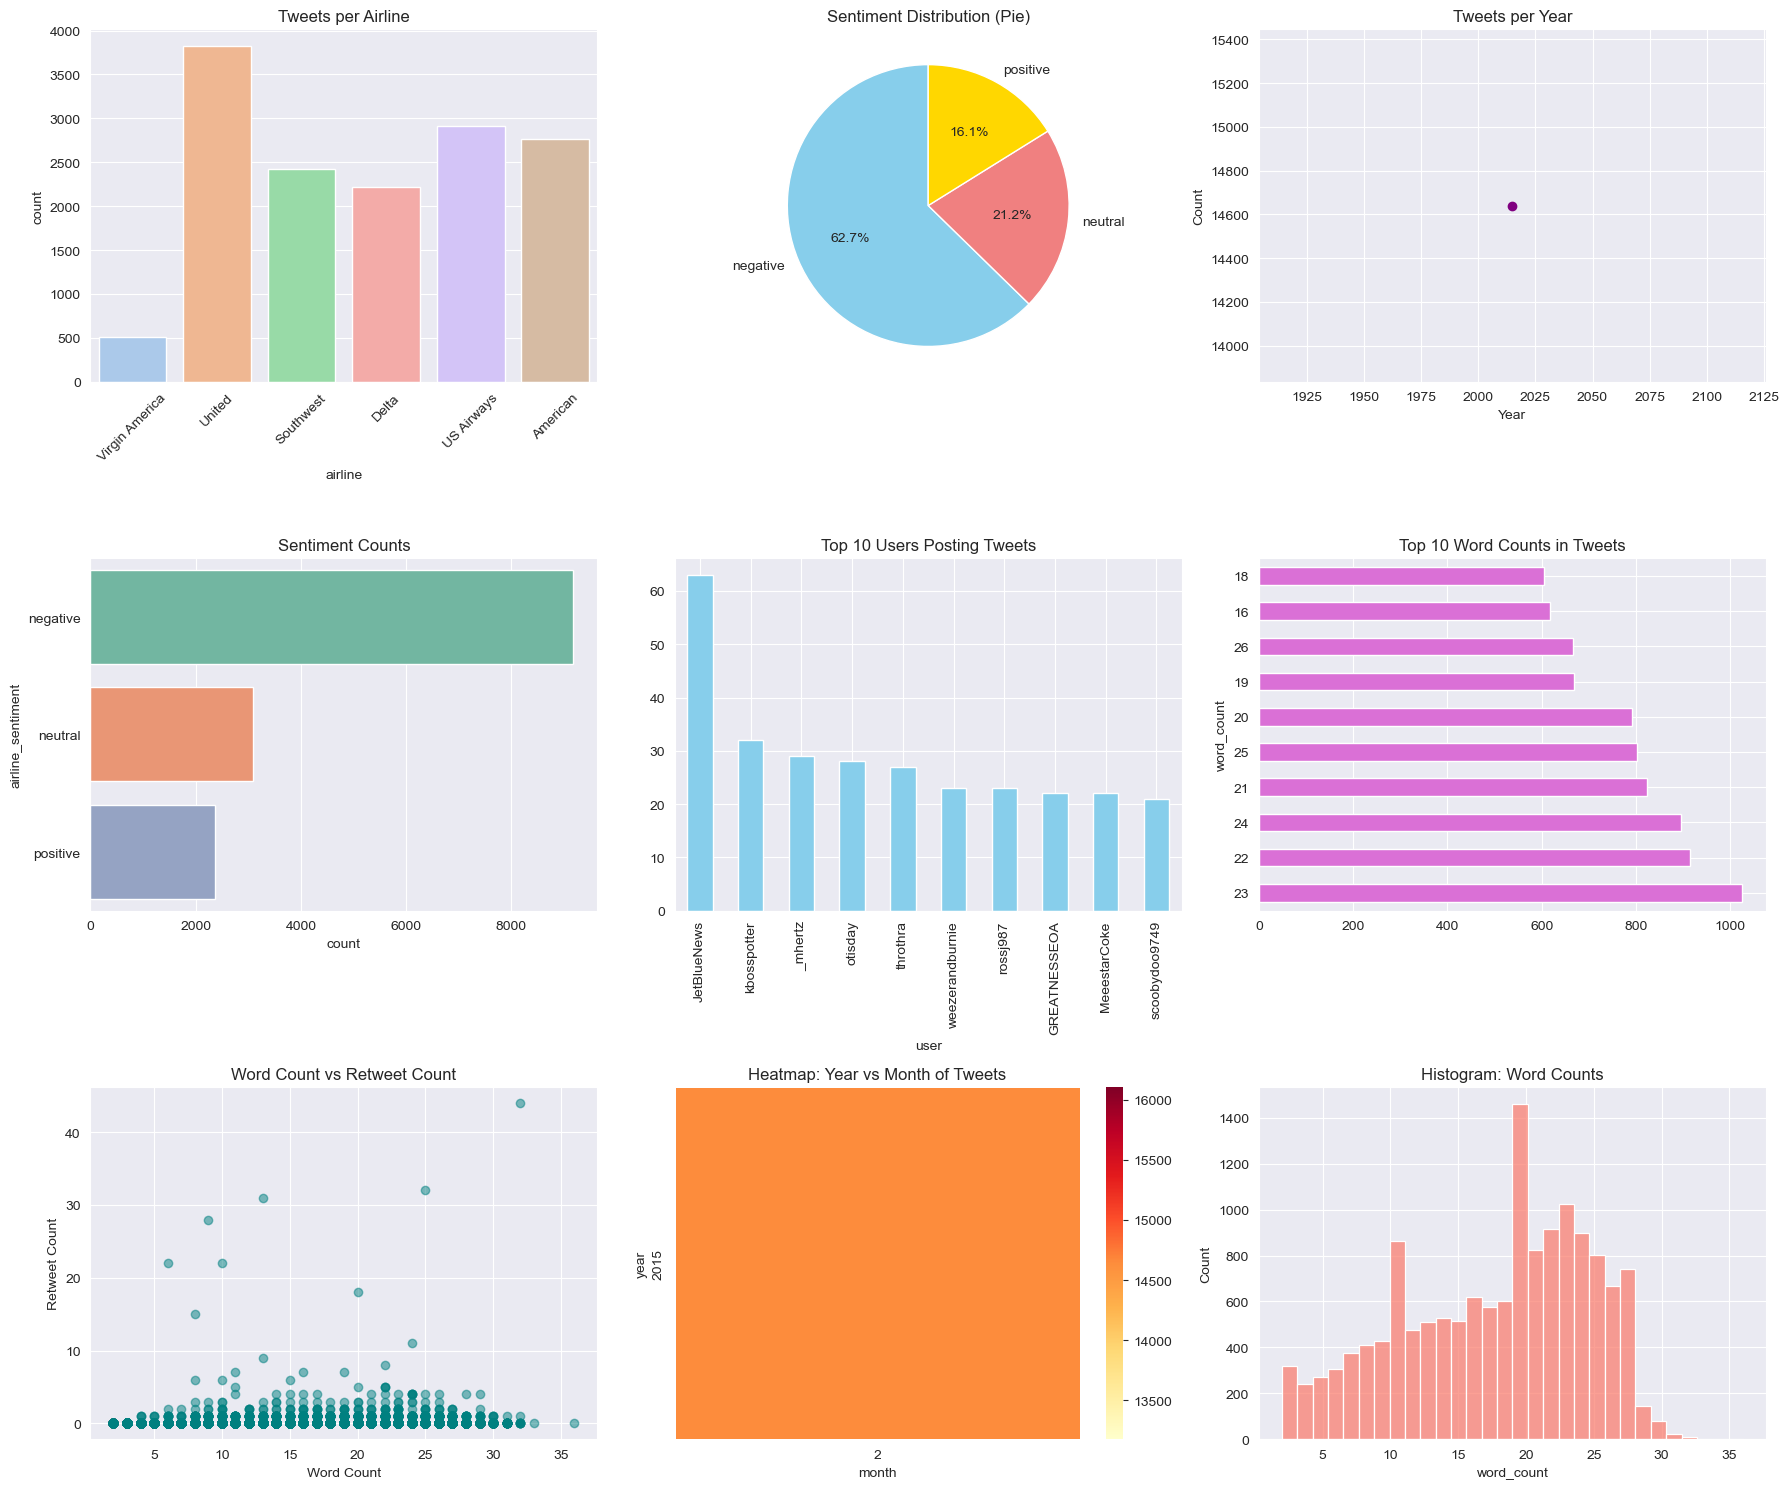

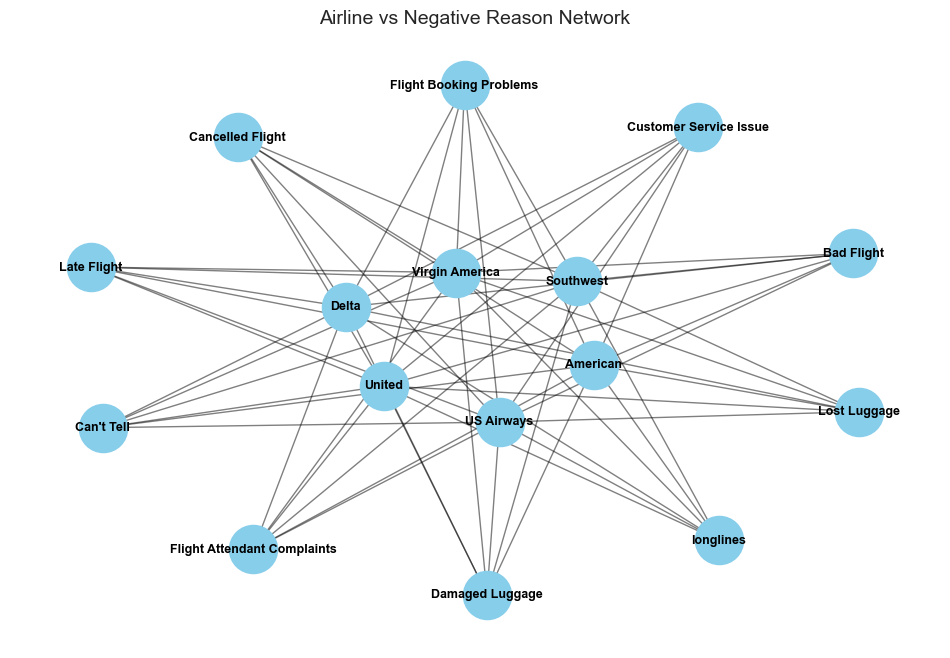

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# ======================
# Load Airline Dataset
# ======================
df = pd.read_csv("./Frontend/public/Tweets.csv")

# Clean inf values
df = df.replace([float("inf"), float("-inf")], pd.NA)

# Add word count
df["word_count"] = df["text"].apply(lambda x: len(str(x).split()))

# Convert created_at to datetime (if available)
if "tweet_created" in df.columns:
    df["tweet_created"] = pd.to_datetime(df["tweet_created"], errors="coerce")
    df["year"] = df["tweet_created"].dt.year
    df["month"] = df["tweet_created"].dt.month

sns.set_style("darkgrid")

# ======================
# 1. EDA PLOTS (2x2 basic)
# ======================
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.countplot(x="airline_sentiment", data=df, ax=axes[0, 0], palette="Set2")
axes[0, 0].set_title("Sentiment Distribution")

sns.countplot(
    x="airline", hue="airline_sentiment",
    data=df, ax=axes[0, 1], palette="coolwarm"
)
axes[0, 1].set_title("Airline Sentiment Breakdown")
axes[0, 1].tick_params(axis="x", rotation=45)

sns.histplot(df["word_count"], bins=30, kde=True, ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Word Count Distribution")

sns.boxplot(
    x="airline_sentiment", y="retweet_count",
    data=df, ax=axes[1, 1], palette="pastel"
)
axes[1, 1].set_title("Retweet Count by Sentiment")
axes[1, 1].set_yscale("log")

plt.tight_layout()
plt.savefig("./Frontend/public/eda_basic.png", bbox_inches="tight")
plt.show()
plt.close(fig)

# ======================
# 2. EXTRA EDA PLOTS (3x3 grid)
# ======================
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# 1. Tweets per Airline (Bar)
sns.countplot(data=df, x="airline", palette="pastel", ax=axes[0, 0])
axes[0, 0].set_title("Tweets per Airline")
axes[0, 0].tick_params(axis="x", rotation=45)

# 2. Pie Chart: Sentiment Distribution
df["airline_sentiment"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", startangle=90,
    colors=["skyblue", "lightcoral", "gold"], ax=axes[0, 1]
)
axes[0, 1].set_ylabel("")
axes[0, 1].set_title("Sentiment Distribution (Pie)")

# 3. Line Graph: Tweets per Year
if "year" in df.columns:
    year_trend = df["year"].value_counts().sort_index()
    axes[0, 2].plot(year_trend.index, year_trend.values, color="purple", marker="o")
    axes[0, 2].set_title("Tweets per Year")
    axes[0, 2].set_xlabel("Year")
    axes[0, 2].set_ylabel("Count")

# 4. Most Frequent Sentiments
sns.countplot(
    data=df, y="airline_sentiment",
    order=df["airline_sentiment"].value_counts().index,
    palette="Set2", ax=axes[1, 0]
)
axes[1, 0].set_title("Sentiment Counts")

# 5. Top 10 Users
df["user"] = df["name"] if "name" in df.columns else df["airline"]
df["user"].value_counts().head(10).plot(kind="bar", color="skyblue", ax=axes[1, 1])
axes[1, 1].set_title("Top 10 Users Posting Tweets")

# 6. Top 10 Word Counts
df["word_count"].value_counts().head(10).plot(kind="barh", color="orchid", ax=axes[1, 2])
axes[1, 2].set_title("Top 10 Word Counts in Tweets")

# 7. Scatter: Retweet Count vs Word Count
axes[2, 0].scatter(df["word_count"], df["retweet_count"], alpha=0.5, color="teal")
axes[2, 0].set_title("Word Count vs Retweet Count")
axes[2, 0].set_xlabel("Word Count")
axes[2, 0].set_ylabel("Retweet Count")

# 8. Heatmap: Tweets Added (Year vs Month)
if "year" in df.columns and "month" in df.columns:
    heatmap_data = df.pivot_table(
        index="year", columns="month", values="tweet_id" if "tweet_id" in df.columns else "text",
        aggfunc="count"
    )
    sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=0.5, ax=axes[2, 1])
    axes[2, 1].set_title("Heatmap: Year vs Month of Tweets")

# 9. Histogram: Word Count
sns.histplot(df["word_count"], bins=30, kde=False, color="salmon", ax=axes[2, 2])
axes[2, 2].set_title("Histogram: Word Counts")

plt.tight_layout()
plt.savefig("./Frontend/public/eda_extended.png", bbox_inches="tight")
plt.show()
plt.close(fig)

# ======================
# 3. NETWORK GRAPH (Airline vs Negative Reason)
# ======================
neg_df = df[df["airline_sentiment"] == "negative"].dropna(subset=["negativereason"])
edges = list(zip(neg_df["airline"], neg_df["negativereason"]))

G = nx.Graph()
G.add_edges_from(edges)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=1200, node_color="skyblue")
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=9, font_weight="bold")
plt.title("Airline vs Negative Reason Network", fontsize=14)
plt.axis("off")

plt.savefig("./Frontend/public/network.png", bbox_inches="tight")
plt.show()
plt.close()


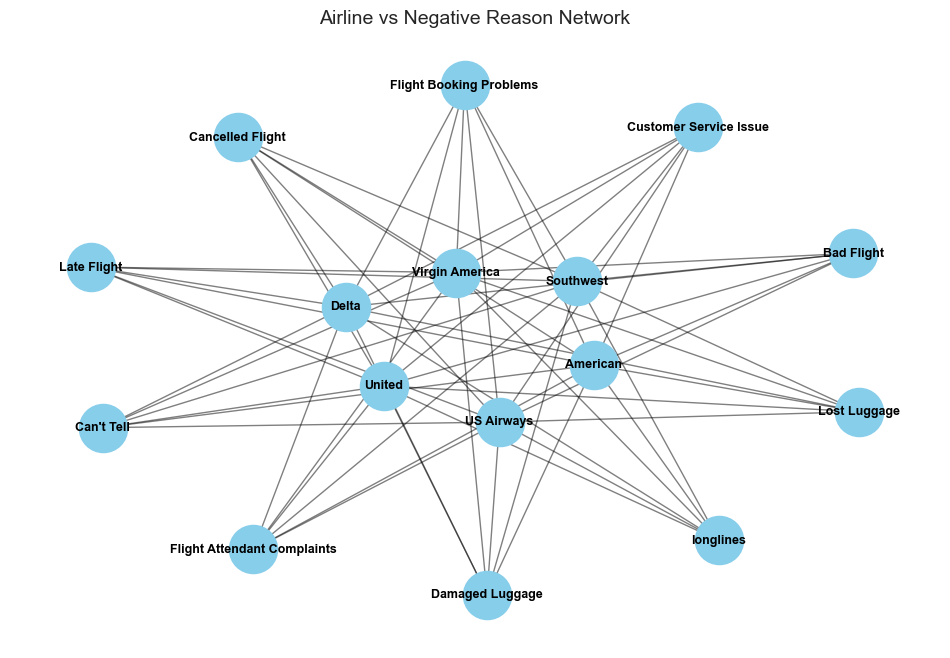

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Filter only negative tweets
neg_df = df[df["airline_sentiment"] == "negative"].dropna(subset=["negativereason"])

# Build edges: airline → negative reason
edges = list(zip(neg_df["airline"], neg_df["negativereason"]))

# Create bipartite graph
G = nx.Graph()
G.add_edges_from(edges)

# Draw
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=1200, node_color="skyblue")
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=9, font_weight="bold")

plt.title("Airline vs Negative Reason Network", fontsize=14)
plt.axis("off")

# Save to your public folder for dashboard use
plt.savefig("./Frontend/public/negative_network.png", bbox_inches="tight")

# Show inside notebook
plt.show()

plt.close()
